<a href="https://colab.research.google.com/github/dagyeom23658/Python_Practice/blob/main/%EC%84%B9%EC%85%983_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EC%A0%84%EC%B2%98%EB%A6%AC_%EC%99%84%EB%A3%8C_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터
https://www.kaggle.com/nithilaa/fitness-analysis?select=fitness+analysis.csv


In [10]:
import csv
pt = list()
with open('/content/fitness analysis.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    i=0
    for row in reader:  # 여기서 틀렸구나.여기서 0부터 해서 컬럼을 넣은상태로 id값을 붙이니까
        li = list(row)
        li.insert(0,i-1)
        tup = tuple(li)
        pt.append(tup)
        i += 1

print(pt)

[(-1, 'Timestamp', 'Your name ', 'Your gender ', 'Your age ', 'How important is exercise to you ?', 'How do you describe your current level of fitness ?', 'How often do you exercise?', 'What barriers, if any, prevent you from exercising more regularly?           (Please select all that apply)', 'What form(s) of exercise do you currently participate in ?                        (Please select all that apply)', 'Do you exercise ___________ ?', 'What time if the day do you prefer to exercise?', 'How long do you spend exercising per day ?', 'Would you say you eat a healthy balanced diet ?', 'What prevents you from eating a healthy balanced diet, If any?                         (Please select all that apply)', 'How healthy do you consider yourself?', 'Have you ever recommended your friends to follow a fitness routine?', 'Have you ever purchased a fitness equipment?', 'What motivates you to exercise?         (Please select all that applies )'), (0, '2019/07/03 11:48:07 PM GMT+5:30', 'Parkavi'

In [11]:
# pandas로 csv파일 읽어오기.

import pandas as pd
df = pd.read_csv("/content/fitness analysis.csv")
df.head(3)

,Timestamp,Your name,Your gender,Your age,How important is exercise to you ?,How do you describe your current level of fitness ?,How often do you exercise?,"What barriers, if any, prevent you from exercising more regularly? (Please select all that apply)",What form(s) of exercise do you currently participate in ? (Please select all that apply),Do you exercise ___________ ?,What time if the day do you prefer to exercise?,How long do you spend exercising per day ?,Would you say you eat a healthy balanced diet ?,"What prevents you from eating a healthy balanced diet, If any? (Please select all that apply)",How healthy do you consider yourself?,Have you ever recommended your friends to follow a fitness routine?,Have you ever purchased a fitness equipment?,What motivates you to exercise? (Please select all that applies )
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [12]:
# 컬럼이름 변경
new_cols=['Timestamp','Name','0.Gender','1.Age','2.Exercise_importance','3.Fitness_level','4.Regularity','5.Barriers','6.Exercises','7.Do_you','8.Time','9.Time_spent','10.Balanced_diet','11.prevents_balanced','12.Health_level','13.Recommend_fitness','14.Equipment','15.Motivation']
df.columns=new_cols
df.head(3)

,Timestamp,Name,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,5.Barriers,6.Exercises,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,11.prevents_balanced,12.Health_level,13.Recommend_fitness,14.Equipment,15.Motivation
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [13]:
df.dtypes

Timestamp                object
Name                     object
0.Gender                 object
1.Age                    object
2.Exercise_importance     int64
3.Fitness_level          object
4.Regularity             object
5.Barriers               object
6.Exercises              object
7.Do_you                 object
8.Time                   object
9.Time_spent             object
10.Balanced_diet         object
11.prevents_balanced     object
12.Health_level           int64
13.Recommend_fitness     object
14.Equipment             object
15.Motivation            object
dtype: object

In [14]:
df.shape

(545, 18)

In [15]:
import copy
df_copy = copy.deepcopy(df)
df_copy.head(3)

,Timestamp,Name,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,5.Barriers,6.Exercises,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,11.prevents_balanced,12.Health_level,13.Recommend_fitness,14.Equipment,15.Motivation
0,2019/07/03 11:48:07 PM GMT+5:30,Parkavi,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,2019/07/03 11:51:22 PM GMT+5:30,Nithilaa,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,2019/07/03 11:56:28 PM GMT+5:30,Karunya v,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [16]:
# 머신러닝 데이터를 만들기 위한 전처리. 필요없는 컬럼 drop

dropped = ['Timestamp', 'Name']
df_copy.drop(dropped,axis=1,inplace=True)
df_copy.head(3)

,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,5.Barriers,6.Exercises,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,11.prevents_balanced,12.Health_level,13.Recommend_fitness,14.Equipment,15.Motivation
0,Female,19 to 25,2,Good,Never,I don't have enough time;I can't stay motivated,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,3,Yes,No,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,4,Very good,Never,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,With a group,Early morning,I don't really exercise,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to be fit;I want to be flexible;I want ...
2,Female,15 to 18,3,Good,1 to 2 times a week,I can't stay motivated,Walking or jogging,Alone,Early morning,30 minutes,Not always,Temptation and cravings,4,Yes,Yes,I want to be fit


In [17]:
# 중복행 처리
df_copy.drop_duplicates(inplace=True, ignore_index = True) # ignore_index = True 사라진 행의 빈 인덱스 재설정

print(df_copy.shape)
df_copy.tail(3)

(534, 16)


,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,5.Barriers,6.Exercises,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,11.prevents_balanced,12.Health_level,13.Recommend_fitness,14.Equipment,15.Motivation
531,Female,19 to 25,4,Average,1 to 2 times a week,I can't stay motivated,Walking or jogging;Yoga,Alone,Early morning,30 minutes,Not always,Ease of access to fast food;Temptation and cra...,4,Yes,No,I want to lose weight;I want to be flexible
532,Male,19 to 25,3,Good,3 to 4 times a week,I don't really enjoy exercising,Walking or jogging,Alone,Evening,30 minutes,Not always,Temptation and cravings,3,Yes,No,I want to relieve stress
533,Female,40 and above,2,Average,Never,I don't have enough time;I can't stay motivate...,I don't really exercise,I don't really exercise,Early morning,I don't really exercise,Not always,Cost;Temptation and cravings,3,No,Yes,I'm sorry ... I'm not really interested in exe...


In [18]:
select = df_copy.iloc[:,[5,6,11,15]]
select.head(3)

,5.Barriers,6.Exercises,11.prevents_balanced,15.Motivation
0,I don't have enough time;I can't stay motivated,I don't really exercise,Ease of access to fast food;Temptation and cra...,I'm sorry ... I'm not really interested in exe...
1,I don't have enough time;I'll become too tired,Walking or jogging;Swimming,Ease of access to fast food;Temptation and cra...,I want to be fit;I want to be flexible;I want ...
2,I can't stay motivated,Walking or jogging,Temptation and cravings,I want to be fit


In [19]:
# index열을 기준으로 합할 것임. 
df_set=df_copy.drop(select, axis=1).reset_index()
df_set.head(3)

,index,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,12.Health_level,13.Recommend_fitness,14.Equipment
0,0,Female,19 to 25,2,Good,Never,I don't really exercise,Early morning,I don't really exercise,Not always,3,Yes,No
1,1,Female,19 to 25,4,Very good,Never,With a group,Early morning,I don't really exercise,Not always,4,Yes,No
2,2,Female,15 to 18,3,Good,1 to 2 times a week,Alone,Early morning,30 minutes,Not always,4,Yes,Yes


In [20]:
barriers=select['5.Barriers'].to_frame()

a=[]
b=[]
dic = {'index':a,
       '5.Barriers':b}

i = 0
for selected_options in barriers['5.Barriers']:
    for barriers in selected_options.split(";"):
        a.append(i)
        b.append(barriers)
    i+=1

df_barriers = pd.DataFrame(dic)
df_barriers

,index,5.Barriers
0,0,I don't have enough time
1,0,I can't stay motivated
2,1,I don't have enough time
3,1,I'll become too tired
4,2,I can't stay motivated
...,...,...
736,531,I can't stay motivated
737,532,I don't really enjoy exercising
738,533,I don't have enough time
739,533,I can't stay motivated


In [21]:
exercises=select['6.Exercises'].to_frame()

a=[]
b=[]
dic = {'index':a,
       '6.Exercises':b}

i = 0
for selected_options in exercises['6.Exercises']:
    for exercises in selected_options.split(";"):
        a.append(i)
        b.append(exercises)
    i+=1

df_exercises = pd.DataFrame(dic)
df_exercises

,index,6.Exercises
0,0,I don't really exercise
1,1,Walking or jogging
2,1,Swimming
3,2,Walking or jogging
4,3,Walking or jogging
...,...,...
828,530,Swimming
829,531,Walking or jogging
830,531,Yoga
831,532,Walking or jogging


In [22]:
balance=select['11.prevents_balanced'].to_frame()

a=[]
b=[]
dic = {'index':a,
       '11.prevents_balanced':b}

i = 0
for selected_options in balance['11.prevents_balanced']:
    for balance in selected_options.split(";"):
        a.append(i)
        b.append(balance)
    i+=1

df_balance = pd.DataFrame(dic)
df_balance

,index,11.prevents_balanced
0,0,Ease of access to fast food
1,0,Temptation and cravings
2,1,Ease of access to fast food
3,1,Temptation and cravings
4,2,Temptation and cravings
...,...,...
674,531,Ease of access to fast food
675,531,Temptation and cravings
676,532,Temptation and cravings
677,533,Cost


In [23]:
motivation = select['15.Motivation'].to_frame()  #판다스를 데이터프레임으로.

a=[]
b=[]
dic = {'index':a,
       '15.Motivation':b}
i = 0
for selected_options in motivation['15.Motivation']:
    for motivation in selected_options.split(";"):
        a.append(i)
        b.append(motivation)
    i+=1
    
df_motivation = pd.DataFrame(dic)
df_motivation

,index,15.Motivation
0,0,I'm sorry ... I'm not really interested in exe...
1,1,I want to be fit
2,1,I want to be flexible
3,1,I want to relieve stress
4,1,I'm sorry ... I'm not really interested in exe...
...,...,...
1057,530,I want to relieve stress
1058,531,I want to lose weight
1059,531,I want to be flexible
1060,532,I want to relieve stress


In [24]:
# index를 기준으로 merge
# df_set.shape = (534, 13)

# df_barriers(741, 2)
df_1 = df_set.merge(df_barriers, how = 'left')

# df_exercises(833, 2)
df_2 = df_1.merge(df_exercises, how = 'left')

# df_balance(679, 2)
df_3 = df_2.merge(df_balance, how = 'left')

# df_motivation(1062, 2)
df_4 = df_3.merge(df_motivation, how = 'left')

In [25]:
fitt = df_4.drop(['index'], axis=1)
fitt.head(3)

,0.Gender,1.Age,2.Exercise_importance,3.Fitness_level,4.Regularity,7.Do_you,8.Time,9.Time_spent,10.Balanced_diet,12.Health_level,13.Recommend_fitness,14.Equipment,5.Barriers,6.Exercises,11.prevents_balanced,15.Motivation
0,Female,19 to 25,2,Good,Never,I don't really exercise,Early morning,I don't really exercise,Not always,3,Yes,No,I don't have enough time,I don't really exercise,Ease of access to fast food,I'm sorry ... I'm not really interested in exe...
1,Female,19 to 25,2,Good,Never,I don't really exercise,Early morning,I don't really exercise,Not always,3,Yes,No,I don't have enough time,I don't really exercise,Temptation and cravings,I'm sorry ... I'm not really interested in exe...
2,Female,19 to 25,2,Good,Never,I don't really exercise,Early morning,I don't really exercise,Not always,3,Yes,No,I can't stay motivated,I don't really exercise,Ease of access to fast food,I'm sorry ... I'm not really interested in exe...


In [67]:
len('Early morning')

13

In [86]:
for i in fitt['0.Gender'].unique():
    print(len(i))

6
4


In [26]:
fitt.to_csv('fitness(1).csv', index=False)

In [64]:
fitt.columns

Index(['0.Gender', '1.Age', '2.Exercise_importance', '3.Fitness_level',
       '4.Regularity', '7.Do_you', '8.Time', '9.Time_spent',
       '10.Balanced_diet', '12.Health_level', '13.Recommend_fitness',
       '14.Equipment', '5.Barriers', '6.Exercises', '11.prevents_balanced',
       '15.Motivation'],
      dtype='object')

In [27]:
fitt.nunique()

0.Gender                  2
1.Age                     5
2.Exercise_importance     5
3.Fitness_level           5
4.Regularity              6
7.Do_you                  5
8.Time                    3
9.Time_spent              5
10.Balanced_diet          3
12.Health_level           5
13.Recommend_fitness      2
14.Equipment              2
5.Barriers               20
6.Exercises               8
11.prevents_balanced     10
15.Motivation            21
dtype: int64

In [28]:
# 타겟의 비율 보기.
target = '6.Exercises'
fitt[target].value_counts(normalize=True) 

Walking or jogging         0.367272
Gym                        0.180324
Team sport                 0.108930
Yoga                       0.098871
I don't really exercise    0.080716
Lifting weights            0.080471
Swimming                   0.048822
Zumba dance                0.034593
Name: 6.Exercises, dtype: float64

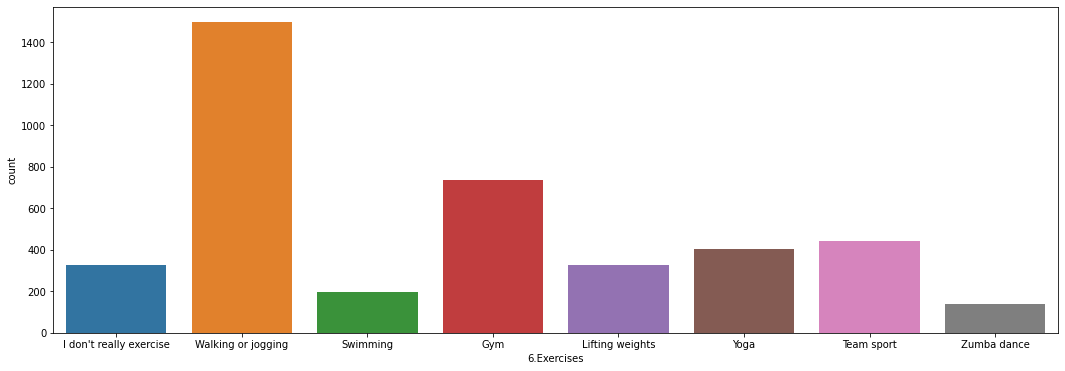

In [29]:
# 각각 클래스의 데이터수는 다음과 같다. 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ax = plt.subplots(figsize=(18, 6))
ax = sns.countplot(x=fitt[target]);
# 타겟비율 불균형, 다중분류

In [30]:
# 데이터 갯수가 적어서 교차검증으로 하기로 함.
from sklearn.model_selection import train_test_split

train, test = train_test_split(fitt,
                                train_size=0.80,
                                test_size=0.20,
                                stratify=fitt[target],
                                random_state=2)

train.shape, test.shape

((3260, 16), (816, 16))

In [31]:
X_train = train.drop(columns=['5.Barriers','15.Motivation','6.Exercises'])
y_train = train[target]
 
X_test = test.drop(columns=['5.Barriers','15.Motivation','6.Exercises'])
y_test = test[target]

In [32]:
pip install category_encoders

     |████████████████████████████████| 80 kB 3.7 MB/s 


In [33]:
from category_encoders import OrdinalEncoder

import lightgbm as lgb

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score  # 평가지표 5개

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [34]:
# smote오버샘플링을 위한 전처리
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)

y_train_encoded= le.transform(y_train)
y_train_encoded
# # le.inverse_transform(a)

array([0, 2, 5, ..., 5, 7, 5])

In [36]:
# 오버샘플링

from imblearn.over_sampling import SMOTE
# smote는 정수값만 받는다. 

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train_encoded,y_train_encoded)

print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts());

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (3260, 13) (3260,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (9576, 13) (9576,)
SMOTE 적용 후 레이블 값 분포: 
 7    1197
6    1197
5    1197
4    1197
3    1197
2    1197
1    1197
0    1197
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
# 모델정의
from lightgbm import LGBMClassifier


lgbm= LGBMClassifier(random_state=2
                  , n_jobs=-1
                  , learning_rate=0.2
                 )

lgbm.fit(X_train_over, y_train_over);

In [38]:
k=5
scores = cross_val_score(lgbm, X_train_over, y_train_over, cv=k, 
                         scoring='accuracy')

print(f'accuracy ({k} folds):', scores.mean())

accuracy (5 folds): 0.7237947311904152


In [39]:
pip install eli5

     |████████████████████████████████| 106 kB 5.4 MB/s 


In [40]:
X_test_encoded = encoder.transform(X_test)
y_test_encoded = le.transform(y_test)

In [41]:
# 순열중요도

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

#permuter정의
permuter = PermutationImportance(
    lgbm,  #model
    scoring='accuracy',
    n_iter=5,  #다른 랜덤시드 사용해서 5번 반복
    random_state=2)


permuter.fit(X_test_encoded, y_test_encoded);

In [42]:
feature_names = X_test.columns.tolist()
permutation_list = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending = False).index
permutation_list

Index(['7.Do_you', '4.Regularity', '1.Age', '9.Time_spent',
       '13.Recommend_fitness', '0.Gender', '3.Fitness_level', '14.Equipment',
       '2.Exercise_importance', '10.Balanced_diet', '12.Health_level',
       '8.Time', '11.prevents_balanced'],
      dtype='object')

In [43]:
# 특성별 score 확인
eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식
)

Weight,Feature
0.0549 ± 0.0091,7.Do_you
0.0502 ± 0.0205,4.Regularity
0.0201 ± 0.0235,1.Age
0.0164 ± 0.0173,9.Time_spent
0.0100 ± 0.0132,13.Recommend_fitness
0.0029 ± 0.0083,0.Gender
-0.0020 ± 0.0211,3.Fitness_level
-0.0029 ± 0.0157,14.Equipment
-0.0069 ± 0.0170,2.Exercise_importance
-0.0071 ± 0.0162,10.Balanced_diet


In [44]:
minimum_importance = 0.0001
mask = permuter.feature_importances_ > minimum_importance
features = X_train.columns[mask]
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [45]:
# smote오버샘플링을 위한 전처리
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train_selected)

le = LabelEncoder()
le.fit(y_train)

y_train_encoded= le.transform(y_train)
y_train_encoded
# # le.inverse_transform(a)

array([0, 2, 5, ..., 5, 7, 5])

In [46]:
# 오버샘플링

from imblearn.over_sampling import SMOTE
# smote는 정수값만 받는다. 

smote = SMOTE(random_state=0)
X_train_over,y_train_over = smote.fit_sample(X_train_encoded,y_train_encoded)

In [47]:
# 모델재정의

from lightgbm import LGBMClassifier

model= LGBMClassifier(random_state=2
                  , n_jobs=-1
                  , learning_rate=0.2
                 )

model.fit(X_train_over, y_train_over);

In [48]:
k=5
scores = cross_val_score(lgbm, X_train_over, y_train_over, cv=k, 
                         scoring='accuracy')

print(f'accuracy ({k} folds):', scores.mean())

accuracy (5 folds): 0.6464110390990805


In [49]:
X_test_encoded = encoder.transform(X_test_selected)
y_test_encoded = le.transform(y_test)

In [50]:
X_test_selected.head(3)

,0.Gender,1.Age,4.Regularity,7.Do_you,9.Time_spent,13.Recommend_fitness
316,Male,15 to 18,3 to 4 times a week,With a friend,2 hours,No
1448,Male,19 to 25,Everyday,Alone,1 hour,Yes
429,Female,19 to 25,2 to 3 times a week,Alone,1 hour,Yes


In [51]:
X_test_selected['1.Age'].unique()

array(['15 to 18', '19 to 25', '30 to 40', '40 and above', '26 to 30'],
      dtype=object)

In [52]:
X_test_selected['0.Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [53]:
X_test_selected['4.Regularity'].unique()

array(['3 to 4 times a week', 'Everyday', '2 to 3 times a week',
       '1 to 2 times a week', '5 to 6 times a week', 'Never'],
      dtype=object)

In [54]:

X_test_selected['7.Do_you'].unique()

array(['With a friend', 'Alone', 'With a group',
       'Within a class environment', "I don't really exercise"],
      dtype=object)

In [55]:
X_test_selected['9.Time_spent'].unique()

array(['2 hours', '1 hour', '30 minutes', "I don't really exercise",
       '3 hours and above'], dtype=object)

In [56]:
X_test_selected['13.Recommend_fitness'].unique()

array(['No', 'Yes'], dtype=object)

In [57]:
X_test_encoded #인코딩이 잘 되어 있다. 

,0.Gender,1.Age,4.Regularity,7.Do_you,9.Time_spent,13.Recommend_fitness
316,2,1,5,1,2,2
1448,2,3,2,3,3,1
429,1,3,1,3,3,1
3599,1,5,3,3,1,2
1315,2,1,3,3,1,2
...,...,...,...,...,...,...
3597,1,1,6,1,2,1
3952,1,2,1,3,1,1
838,1,3,2,3,2,1
1526,1,1,3,5,1,1


In [58]:
X_test_selected.columns

Index(['0.Gender', '1.Age', '4.Regularity', '7.Do_you', '9.Time_spent',
       '13.Recommend_fitness'],
      dtype='object')

In [59]:
print('테스트셋 정확도', model.score(X_test_encoded, y_test_encoded))
# 몹쓸 모델이 나왔다. 

테스트셋 정확도 0.4117647058823529


In [60]:
# 데이터를 넣어서 예측해보기

Gender = 'Female'
Age =  "19 to 25"
Regularity = "Never" 
Do_you = 'With a friend'
Time_spent = "I don't really exercise"
Recommend_fitness = "No"

set = pd.DataFrame({"0.Gender":[Gender], "1.Age":[Age], "4.Regularity":[Regularity], "7.Do_you":[Do_you], "9.Time_spent":[Time_spent],"13.Recommend_fitness" : [Recommend_fitness]})
set

,0.Gender,1.Age,4.Regularity,7.Do_you,9.Time_spent,13.Recommend_fitness
0,Female,19 to 25,Never,With a friend,I don't really exercise,No


In [61]:
X_pred = encoder.transform(set)  # -1값도 있고, 12.Health_level은 인코딩되지 않는다. 왜?
X_pred

,0.Gender,1.Age,4.Regularity,7.Do_you,9.Time_spent,13.Recommend_fitness
0,1,3,4,1,4,2


In [62]:
le.inverse_transform(model.predict(X_pred))

array(['Walking or jogging'], dtype=object)

In [63]:
하 ㅠ 

SyntaxError: ignored